# Final Capstone Project -AAI-590-Group-02 Jupyter Notebook 

**Team:** Group 02 — Angshuman Roy, Harish Kapettu Acharya, Sandeep Kumar Jakkaraju  
**Dataset:** Kaggle – ULB Machine Learning Group, *Credit Card Fraud Detection* (`creditcard.csv`)  
**Goal:** Build and compare machine learning models that detect fraudulent transactions in a highly imbalanced credit-card dataset.

This notebook is structured to satisfy the assignment prompts:
1. **Variables & Datatypes** — What variables exist and their types?
2. **Data Issues & Handling** — Missing data, duplicates, imbalance, skew/outliers; why might these issues exist?
3. **Relevance to Project Goal** — Which variables/transformations/engineered features appear useful?
4. **Relationships Among Variables** — Correlations and modeling implications.
5. **Visualizations of Interest** — Only those that support your observations.

> **Note:** The modeling phase and full feature engineering are **not required** here; we only **identify** if transformations/features *may be needed later*.

## How to Use This Notebook

**What you will see:** A complete, end-to-end workflow from data summary and EDA through classical ML models, gradient-boosting model, deep neural networks, and anomaly detection baselines.

1. **Setup & Data Loading** – imports, configuration, and reading `creditcard.csv`.
2. **Data Summary & EDA** – variables, datatypes, imbalance, skew, and key visualizations.
3. **Feature Engineering for EDA** – `LogAmount` and `HourOfDay` features.
4. **Train/Validation/Test Split & Scaling** – reproducible splits and standardized features.
5. **Baseline Supervised Models** – Logistic Regression, Random Forest, Linear SVM, Naive Bayes, k-NN.
6. **Gradient-Boosting Model** – XGBoost, LightGBM (CatBoost optional).
7. **Deep Neural Network (Keras)** – custom feed-forward DNN with class weighting and early stopping.
8. **Unsupervised / Anomaly Detection Models** – Isolation Forest, Local Outlier Factor, Autoencoder.
9. **Model Comparison Notes** – brief interpretation of metrics, to be summarized in the written report.

The notebook intentionally **follows the CRISP-DM flow** (business understanding → data understanding → modeling → evaluation) to stay aligned with our project management plan.


## 0. Setup & Load

- Place `creditcard.csv` next to this notebook, or update `DATA_PATH` accordingly.
- We use **matplotlib only** (no seaborn), **one plot per figure**, and **no explicit colors** (per instruction).

## Environment & Dependencies

This notebook was developed and tested with:

- Python 3.10+
- `pandas`, `numpy`
- `matplotlib`
- `scikit-learn`
- `xgboost`
- `lightgbm`
- `catboost` (optional; used only if installed)
- `tensorflow` / `keras`

To reproduce all results, you can create an environment and install dependencies via:

```bash
pip install pandas numpy matplotlib scikit-learn xgboost lightgbm catboost tensorflow


In [1]:
import sys
print(sys.executable)

C:\Users\aroy\anaconda3\python.exe


In [2]:
#import sys
#!/Users/harish/Documents/workspace/python3virtualenv4/bin/python3 -m pip install catboost

In [3]:
!pip3 install catboost


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

# Path to the dataset
DATA_PATH = "creditcard.csv"  # change if stored elsewhere

# Load the dataset
df = pd.read_csv(DATA_PATH)
n_rows, n_cols = df.shape
print(f"Loaded shape: {n_rows:,} rows x {n_cols} columns")
display(df.head())

Loaded shape: 284,807 rows x 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Variables & Datatypes

This section answers:  
**“What variables are present in the dataset, and what are their datatypes and basic statistics?”**

We:

- List each column name and its datatype.
- Compute `.describe()` statistics to understand ranges, means, and standard deviations.

- `Time` — seconds elapsed between each transaction and the first transaction in the dataset (numeric).  
- `V1`–`V28` — **PCA-transformed** features, anonymized for confidentiality (numeric).  
- `Amount` — transaction amount (numeric).  
- `Class` — target label (binary: `0` = genuine, `1` = fraud).

These outputs directly support the **Data Summary** portion of the written report.


In [5]:
# Variables & dtypes
vars_dtypes = pd.DataFrame({'column': df.columns, 'dtype': df.dtypes.astype(str)})
display(vars_dtypes)

# Basic describe (numeric)
display(df.describe().T)

,column,dtype
Time,Time,float64
V1,V1,float64
V2,V2,float64
V3,V3,float64
V4,V4,float64
V5,V5,float64
V6,V6,float64
V7,V7,float64
V8,V8,float64
V9,V9,float64


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 2. Data Issues & Handling

Here we systematically inspect potential data-quality issues:

- **Missing values** in any column.
- **Duplicate rows** that could bias model training.
- **Class imbalance** between genuine and fraudulent transactions.
- **Skew and outliers** in the `Amount` feature.

We also compute an approximate outlier count using the IQR rule.  
This section motivates later design choices such as using precision/recall instead of plain accuracy and applying class-weighting and log transforms.

We also reason about the **likely source** of each issue:
- Class imbalance: fraud is **rare** in real-world data (business reality).  
- Feature anonymization: done to protect **privacy & confidentiality**.  
- Time window: dataset covers only **two days**, which can affect temporal distributions.

In [6]:
# Missing values
missing = df.isna().sum().reset_index()
missing.columns = ['column','missing_count']
display(missing)

# Duplicates
duplicate_count = int(df.duplicated().sum())
print("Duplicate rows:", duplicate_count)

# Class imbalance
class_counts = df['Class'].value_counts(dropna=False).sort_index()
fraud_rate = class_counts.get(1, 0)/class_counts.sum()
print("Class counts:\n", class_counts.to_string())
print(f"Fraud rate: {fraud_rate:.4%}")

# Skew / outliers for Amount
amount_skew = float(df['Amount'].skew())
Q1, Q3 = df['Amount'].quantile(0.25), df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5*IQR, Q3 + 1.5*IQR
amount_outliers = int(((df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)).sum())
print(f"Amount skew: {amount_skew:.2f}")
print(f"Amount IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
print("Approx. Amount outlier count (IQR method):", amount_outliers)

,column,missing_count
0,Time,0
1,V1,0
2,V2,0
3,V3,0
4,V4,0
5,V5,0
6,V6,0
7,V7,0
8,V8,0
9,V9,0


Duplicate rows: 1081
Class counts:
 Class
0    284315
1       492
Fraud rate: 0.1727%
Amount skew: 16.98
Amount IQR bounds: [-101.75, 184.51]
Approx. Amount outlier count (IQR method): 31904


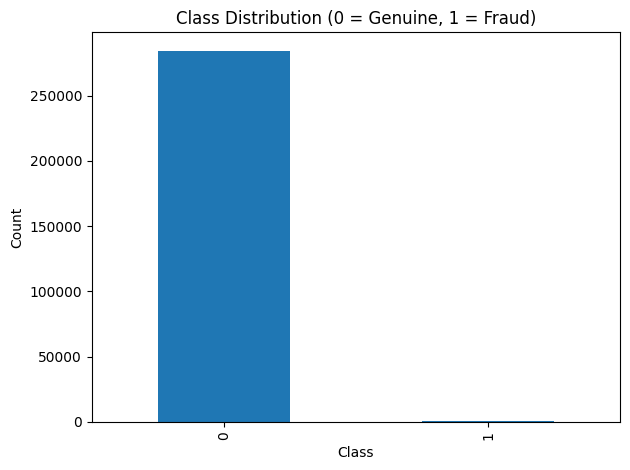

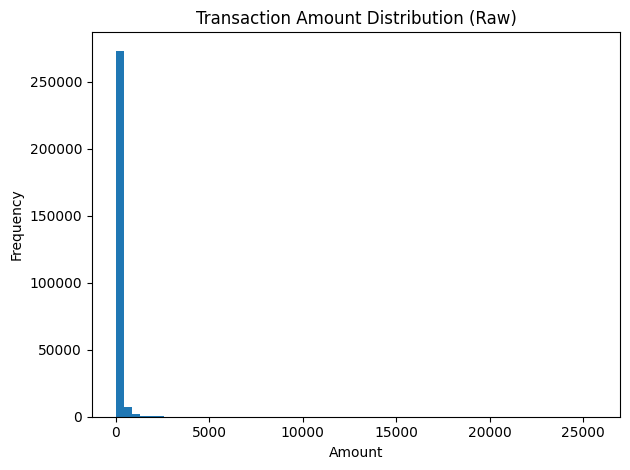

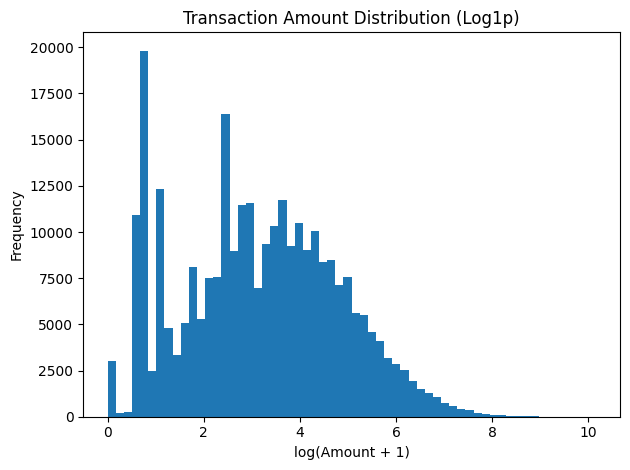

In [7]:
# Visualization: class distribution
plt.figure()
class_counts.plot(kind='bar')
plt.title('Class Distribution (0 = Genuine, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualization: Amount distribution (raw)
plt.figure()
df['Amount'].plot(kind='hist', bins=60)
plt.title('Transaction Amount Distribution (Raw)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization: Amount distribution (log1p)
plt.figure()
np.log1p(df['Amount']).plot(kind='hist', bins=60)
plt.title('Transaction Amount Distribution (Log1p)')
plt.xlabel('log(Amount + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 3. Feature Relevance & Simple Feature Engineering

In this section we connect variables to the project objective:  
**“Can we distinguish fraudulent from genuine transactions?”**

- Engineer two intuitive features:
  - `LogAmount = log(Amount + 1)` to reduce skew.
  - `HourOfDay = floor(Time / 3600) mod 24` to capture time-of-day fraud patterns.
- Compare amount statistics by class.
- Compute fraud rate by hour of day and visualize it.

,Class,count,mean,median,std
0,0,284315,88.291022,22.00,250.105092
1,1,492,122.211321,9.25,256.683288


,HourOfDay,txn_count,fraud_rate
0,0,7695,0.000780
1,1,4220,0.002370
2,2,3328,0.017127
3,3,3492,0.004868
4,4,2209,0.010412
5,5,2990,0.003679
6,6,4101,0.002195
7,7,7243,0.003175
8,8,10276,0.000876
9,9,15838,0.001010


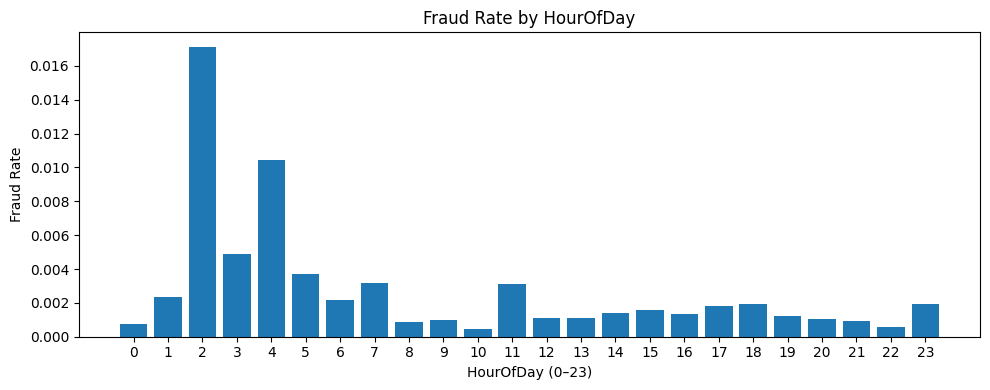

In [8]:
# Engineer two EDA-only features
df['HourOfDay'] = ((df['Time'] // 3600) % 24).astype(int)
df['LogAmount'] = np.log1p(df['Amount'])

# Amount by class comparison
amount_stats = df.groupby('Class')['Amount'].agg(['count','mean','median','std']).reset_index()
display(amount_stats)

# Fraud rate by hour of day
fraud_by_hour = df.groupby('HourOfDay')['Class'].agg(['count','mean']).reset_index()
fraud_by_hour.columns = ['HourOfDay','txn_count','fraud_rate']
display(fraud_by_hour.head(10))

# Plot: Fraud rate by hour
plt.figure(figsize=(10,4))
plt.bar(fraud_by_hour['HourOfDay'].astype(str), fraud_by_hour['fraud_rate'])
plt.title('Fraud Rate by HourOfDay')
plt.xlabel('HourOfDay (0–23)')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

## 4. Relationships Among Variables (Correlations) & Modeling Implications

To understand how features interact and which ones are most predictive of fraud, we:

- Compute the Pearson correlation matrix for all numeric features.
- Rank features by the absolute correlation with the target `Class`.
- Visualize:
  - A bar chart of the top 10 fraud-correlated features.
  - A heatmap of correlations among these top features.

These plots help motivate:
- Why **tree-based models** (Random Forest, XGBoost, LightGBM) are strong choices for this dataset.
- Why linear models may benefit from regularization to handle residual multicollinearity.


,abs_corr_with_Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447
V18,0.111485


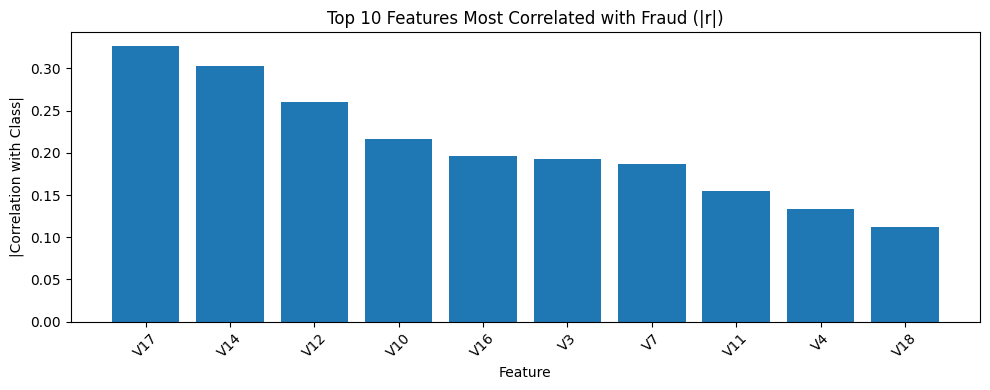

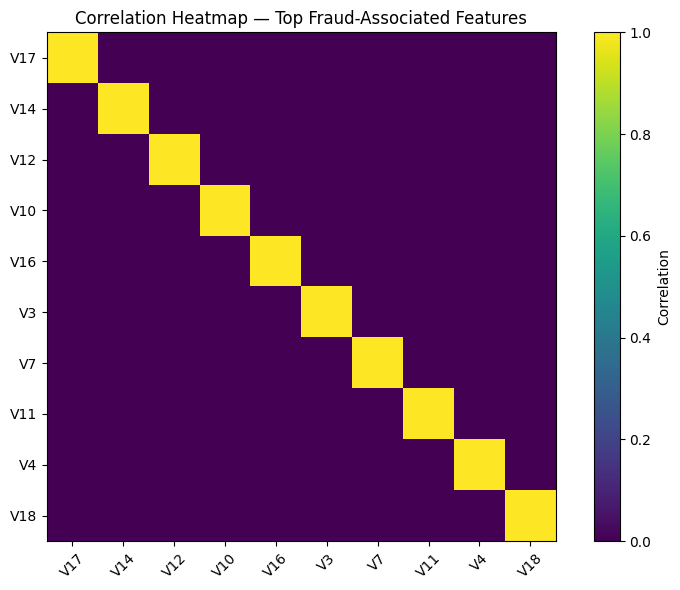

In [9]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Top-10 by |corr with Class|
corr_with_class = corr['Class'].drop(labels=['Class']).abs().sort_values(ascending=False)
top10 = corr_with_class.head(10)
display(top10.to_frame('abs_corr_with_Class'))

# Bar plot of top-10
plt.figure(figsize=(10,4))
plt.bar(top10.index, top10.values)
plt.title('Top 10 Features Most Correlated with Fraud (|r|)')
plt.xlabel('Feature')
plt.ylabel('|Correlation with Class|')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for top-10 inter-feature correlations
top10_features = top10.index.tolist()
subset_corr = corr.loc[top10_features, top10_features]

plt.figure(figsize=(8,6))
plt.imshow(subset_corr, interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(top10_features)), top10_features, rotation=45)
plt.yticks(range(len(top10_features)), top10_features)
plt.title('Correlation Heatmap — Top Fraud-Associated Features')
plt.tight_layout()
plt.show()

## 5. Train/Validation/Test Split & Feature Scaling

Now we transition from EDA into **supervised modeling**.

Steps performed here:

1. **Define features and target**
   - Target: `Class` (0 = genuine, 1 = fraud).
   - Features: all remaining numeric columns, including engineered features.

2. **Create reproducible data splits**
   - 70% Training, 15% Validation, 15% Test.
   - `stratify=y` ensures the rare fraud class is present in all sets.

3. **Standardize features**
   - `StandardScaler` is fit on the training data and applied to validation and test sets.
   - This scaling improves performance for models sensitive to feature magnitudes (e.g., Logistic Regression, SVM, DNN).

The **test set is kept completely unseen** until final evaluation to avoid optimistic bias.


In [10]:

from sklearn.model_selection import train_test_split

# Features: use all numeric columns except the target 'Class'
target_col = 'Class'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols].values
y = df[target_col].values

X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print('Train shape:', X_train_full.shape, 'Val shape:', X_val.shape, 'Test shape:', X_test.shape)


Train shape: (199364, 32) Val shape: (42721, 32) Test shape: (42722, 32)


In [11]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_full)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print('Scaling complete.')


Scaling complete.


## 6. Common Evaluation Helper

To ensure a **fair comparison** across all classification models, we define a reusable helper function that:

- Fits the model on the training data.
- Generates predictions on the validation set.
- Computes and prints:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - ROC-AUC (when probability or score information is available)
- Displays a detailed `classification_report`.

All supervised models (Logistic Regression, Random Forest, SVM, k-NN, etc.) will call this function so that the metrics are directly comparable.


In [12]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_classifier(name, model, X_tr, y_tr, X_va, y_va):
    """Fit the model and print core metrics on validation data."""
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_va)
    # Some models output probabilities, others decision functions
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_va)[:, 1]
    elif hasattr(model, "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        scores = model.decision_function(X_va)
        y_proba = MinMaxScaler().fit_transform(scores.reshape(-1, 1)).ravel()
    else:
        y_proba = y_pred

    acc = accuracy_score(y_va, y_pred)
    prec = precision_score(y_va, y_pred, zero_division=0)
    rec = recall_score(y_va, y_pred, zero_division=0)
    f1 = f1_score(y_va, y_pred, zero_division=0)
    try:
        auc = roc_auc_score(y_va, y_proba)
    except ValueError:
        auc = float('nan')
    print(f"\n==============")
    print(f"\n=== {name} ===")
    print(f"\n==============")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")
    print("\nClassification report:\n", classification_report(y_va, y_pred, zero_division=0))


## 7. Baseline Supervised Models

In this section we train a **suite of classical supervised models** that serve as baselines:

1. **Logistic Regression** (with `class_weight='balanced'`)
2. **Random Forest Classifier**
3. **Linear SVM (`LinearSVC`)**
4. **Naive Bayes**
5. **k-Nearest Neighbors (k-NN)**

For each model we:

- Train on the scaled training set.
- Evaluate on the validation set using the common helper (`evaluate_classifier`).
- Inspect the trade-offs between precision and recall, especially on the rare fraud class.

These results provide context for later, more advanced models (gradient boosting and the DNN).


In [13]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# 1. Logistic Regression (with class_weight='balanced')
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
evaluate_classifier("Logistic Regression", log_reg, X_train, y_train_full, X_val, y_val)

# 2. Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    class_weight='balanced_subsample',
    random_state=42
)
evaluate_classifier("Random Forest", rf, X_train, y_train_full, X_val, y_val)

# 3. Linear SVM via LinearSVC
svm_lin = LinearSVC(class_weight='balanced', random_state=42)
evaluate_classifier("Linear SVM (LinearSVC)", svm_lin, X_train, y_train_full, X_val, y_val)

# 4. Naive Bayes
nb = GaussianNB()
evaluate_classifier("Naive Bayes", nb, X_train, y_train_full, X_val, y_val)

# 5. k-NN
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_classifier("k-NN (k=5)", knn, X_train, y_train_full, X_val, y_val)




=== Logistic Regression ===

Accuracy : 0.9775
Precision: 0.0639
Recall   : 0.8784
F1-score : 0.1190
ROC-AUC  : 0.9704

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.06      0.88      0.12        74

    accuracy                           0.98     42721
   macro avg       0.53      0.93      0.55     42721
weighted avg       1.00      0.98      0.99     42721



=== Random Forest ===

Accuracy : 0.9994
Precision: 0.9808
Recall   : 0.6892
F1-score : 0.8095
ROC-AUC  : 0.9433

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.98      0.69      0.81        74

    accuracy                           1.00     42721
   macro avg       0.99      0.84      0.90     42721
weighted avg       1.00      1.00      1.00     42721



C:\Users\aroy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aroy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(




=== Linear SVM (LinearSVC) ===

Accuracy : 0.9989
Precision: 0.6835
Recall   : 0.7297
F1-score : 0.7059
ROC-AUC  : 0.9589

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.68      0.73      0.71        74

    accuracy                           1.00     42721
   macro avg       0.84      0.86      0.85     42721
weighted avg       1.00      1.00      1.00     42721



=== Naive Bayes ===

Accuracy : 0.9775
Precision: 0.0588
Recall   : 0.7973
F1-score : 0.1095
ROC-AUC  : 0.9554

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.06      0.80      0.11        74

    accuracy                           0.98     42721
   macro avg       0.53      0.89      0.55     42721
weighted avg       1.00      0.98      0.99     42721



=== k-NN (k=5) ===

Accuracy : 0.9993
Precision: 0.8793
R

## 8. Gradient-Boosting Models (XGBoost, LightGBM, CatBoost)

Gradient-boosting decision trees are often **state of the art** for structured tabular data such as credit-card transactions.

We attempt three variants:

- **XGBoost (`XGBClassifier`)**
- **LightGBM (`LGBMClassifier`)**
- **CatBoost (`CatBoostClassifier`)** – only if the library is installed.

Key configuration choices:

- `scale_pos_weight` or `class_weight` to address extreme class imbalance.
- 300 trees with moderate depth to capture non-linear patterns without overfitting.
- `tree_method='hist'` or histogram-based training for speed.

Each model is evaluated on the validation set using the same metrics as earlier baselines.
If a library is unavailable, the cell prints a clear message instead of failing.


In [14]:

# Gradient boosting models: XGBoost, LightGBM, CatBoost
# These imports may require installing the corresponding libraries in your environment.

try:
    from xgboost import XGBClassifier
    xgb_clf = XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        tree_method='hist',
        scale_pos_weight= (y_train_full == 0).sum() / max((y_train_full == 1).sum(), 1),
        random_state=42,
        n_jobs=-1,
    )
    evaluate_classifier("XGBoost", xgb_clf, X_train, y_train_full, X_val, y_val)
except ImportError:
    print("XGBoost is not installed in this environment. Install xgboost to run this cell.")

try:
    import lightgbm as lgb
    lgb_clf = lgb.LGBMClassifier(
        n_estimators=300,
        max_depth=-1,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
    )
    evaluate_classifier("LightGBM", lgb_clf, X_train, y_train_full, X_val, y_val)
except ImportError:
    print("LightGBM is not installed in this environment. Install lightgbm to run this cell.")

try:
    from catboost import CatBoostClassifier
    cat_clf = CatBoostClassifier(
        iterations=300,
        depth=4,
        learning_rate=0.1,
        loss_function='Logloss',
        eval_metric='AUC',
        verbose=False,
        random_seed=42,
        scale_pos_weight= (y_train_full == 0).sum() / max((y_train_full == 1).sum(), 1),
    )
    evaluate_classifier("CatBoost", cat_clf, X_train, y_train_full, X_val, y_val)
except ImportError:
    print("CatBoost is not installed in this environment. Install catboost to run this cell.")




=== XGBoost ===

Accuracy : 0.9994
Precision: 0.8551
Recall   : 0.7973
F1-score : 0.8252
ROC-AUC  : 0.9744

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.86      0.80      0.83        74

    accuracy                           1.00     42721
   macro avg       0.93      0.90      0.91     42721
weighted avg       1.00      1.00      1.00     42721

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7930
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


=== LightGBM ===

Accuracy : 0.9995
Precision

## 9. Deep Neural Network (Keras) — Custom DNN Model

To satisfy the Capstone requirement of implementing a deep learning model from scratch, we build a **feed-forward DNN** in Keras:

- Input: all scaled features (including PCA components plus `Time`, `Amount`, and engineered features).
- Hidden layers: Dense(32, ReLU) → Dense(16, ReLU) → Dense(8, ReLU).
- Output: Dense(1, sigmoid) for binary fraud probability.

Training details:

- Optimizer: Adam (learning rate = 1e-3).
- Loss: Binary cross-entropy.
- Metrics: AUC, Precision, Recall.
- Class weights: computed so the rare fraud class receives ~300× higher weight.
- Early stopping: monitors validation loss and restores best weights.

After training, we evaluate the DNN on the validation set (accuracy, precision, recall, F1, ROC-AUC) to compare with tree-based models.


In [15]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train.shape[1]

dnn_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

dnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[keras.metrics.AUC(name='auc'), keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)

# Compute class weights for DNN
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train_full)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_full)
class_weight_dict = {int(c): w for c, w in zip(classes, class_weights_array)}
print("Class weights for DNN:", class_weight_dict)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = dnn_model.fit(
    X_train, y_train_full,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=2048,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate on validation set
y_val_proba = dnn_model.predict(X_val).ravel()
y_val_pred = (y_val_proba >= 0.5).astype(int)

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
auc = roc_auc_score(y_val, y_val_proba)

print("\n=== DNN (Keras) on Validation ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")


Class weights for DNN: {0: 0.5008642347502763, 1: 289.7732558139535}
Epoch 1/50
98/98 - 3s - 34ms/step - auc: 0.5320 - loss: 0.1449 - precision: 0.0098 - recall: 0.0233 - val_auc: 0.8154 - val_loss: 0.0171 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
98/98 - 0s - 4ms/step - auc: 0.8917 - loss: 0.0096 - precision: 0.8182 - recall: 0.1831 - val_auc: 0.8943 - val_loss: 0.0074 - val_precision: 0.7778 - val_recall: 0.5676
Epoch 3/50
98/98 - 0s - 4ms/step - auc: 0.9221 - loss: 0.0051 - precision: 0.8779 - recall: 0.6686 - val_auc: 0.8869 - val_loss: 0.0055 - val_precision: 0.7742 - val_recall: 0.6486
Epoch 4/50
98/98 - 0s - 4ms/step - auc: 0.9425 - loss: 0.0039 - precision: 0.8819 - recall: 0.7384 - val_auc: 0.9097 - val_loss: 0.0048 - val_precision: 0.7576 - val_recall: 0.6757
Epoch 5/50
98/98 - 0s - 4ms/step - auc: 0.9478 - loss: 0.0035 - precision: 0.8855 - recall: 0.7645 - val_auc: 0.9105 - val_loss: 0.0045 - val_precision: 0.7681 - val_recall: 0.7162
Epoch 6/50
98/98 

## 10. Unsupervised / Anomaly Detection Baselines

Because fraud is a **rare event**, we also explore unsupervised anomaly detection approaches that attempt to learn “normal” transaction behavior:

1. **Isolation Forest**
   - Trained primarily on non-fraud (normal) transactions.
   - Scores validation samples by how easily they are isolated.

2. **Local Outlier Factor (LOF)**
   - Measures how locally dense each sample is compared to its neighbors.

We convert anomaly scores to binary predictions and compute recall, precision, and F1 on the validation set.  
These models generally perform worse than supervised models but are useful references for scenarios with very few labeled fraud examples.


In [16]:

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# For anomaly detection, we primarily use the majority (non-fraud) class for training where appropriate.
mask_train_normal = y_train_full == 0
X_train_normal = X_train[mask_train_normal]

# 1. Isolation Forest
iso = IsolationForest(
    n_estimators=200,
    contamination=float((y_train_full == 1).sum()) / len(y_train_full),
    random_state=42
)
iso.fit(X_train_normal)

# anomaly scores: negative scores -> normal, positive -> anomalies depending on implementation
iso_scores = -iso.decision_function(X_val)
iso_thresh = np.percentile(iso_scores, 100 * (1 - (y_train_full == 1).sum() / len(y_train_full)))
y_iso_pred = (iso_scores >= iso_thresh).astype(int)

print("\n=== Isolation Forest (treated as anomaly detector) ===")
print("Recall:", recall_score(y_val, y_iso_pred, zero_division=0))
print("Precision:", precision_score(y_val, y_iso_pred, zero_division=0))
print("F1-score:", f1_score(y_val, y_iso_pred, zero_division=0))

# 2. Local Outlier Factor (LOF)
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=float((y_train_full == 1).sum()) / len(y_train_full),
    novelty=True
)
lof.fit(X_train_normal)
lof_scores = -lof.decision_function(X_val)
lof_thresh = np.percentile(lof_scores, 100 * (1 - (y_train_full == 1).sum() / len(y_train_full)))
y_lof_pred = (lof_scores >= lof_thresh).astype(int)

print("\n=== Local Outlier Factor (treated as anomaly detector) ===")
print("Recall:", recall_score(y_val, y_lof_pred, zero_division=0))
print("Precision:", precision_score(y_val, y_lof_pred, zero_division=0))
print("F1-score:", f1_score(y_val, y_lof_pred, zero_division=0))



=== Isolation Forest (treated as anomaly detector) ===
Recall: 0.17567567567567569
Precision: 0.17567567567567569
F1-score: 0.17567567567567569

=== Local Outlier Factor (treated as anomaly detector) ===
Recall: 0.02702702702702703
Precision: 0.02702702702702703
F1-score: 0.02702702702702703


### 10.1 Autoencoder-Based Anomaly Detection

Finally, we train a simple **autoencoder** only on genuine (non-fraud) transactions:

- The encoder learns a compressed representation of normal behavior.
- Reconstruction error on validation data is used as an anomaly score.
- A threshold is chosen as the 99th percentile of reconstruction error for normal validation samples.

Transactions with reconstruction error above the threshold are flagged as potential fraud.  
We again report recall, precision, and F1, and compare against Isolation Forest and LOF.


In [17]:

# Simple Autoencoder on non-fraud training data
input_dim = X_train.shape[1]

ae_input = keras.Input(shape=(input_dim,))
encoded = layers.Dense(16, activation='relu')(ae_input)
encoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = keras.Model(ae_input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

history_ae = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=30,
    batch_size=2048,
    validation_data=(X_val[y_val == 0], X_val[y_val == 0]),
    verbose=2
)

# Reconstruction error on validation
recon_val = autoencoder.predict(X_val)
recon_err = np.mean((X_val - recon_val)**2, axis=1)

# Choose threshold as, say, 99th percentile of normal reconstruction error on validation normals
normal_errs = recon_err[y_val == 0]
thresh = np.percentile(normal_errs, 99)
y_ae_pred = (recon_err >= thresh).astype(int)

print("\n=== Autoencoder anomaly detector (validation) ===")
print("Recall:", recall_score(y_val, y_ae_pred, zero_division=0))
print("Precision:", precision_score(y_val, y_ae_pred, zero_division=0))
print("F1-score:", f1_score(y_val, y_ae_pred, zero_division=0))


Epoch 1/30
98/98 - 4s - 36ms/step - loss: 0.9384 - val_loss: 0.8676
Epoch 2/30
98/98 - 0s - 5ms/step - loss: 0.8097 - val_loss: 0.7699
Epoch 3/30
98/98 - 1s - 5ms/step - loss: 0.7314 - val_loss: 0.7051
Epoch 4/30
98/98 - 0s - 4ms/step - loss: 0.6732 - val_loss: 0.6525
Epoch 5/30
98/98 - 0s - 5ms/step - loss: 0.6277 - val_loss: 0.6136
Epoch 6/30
98/98 - 0s - 5ms/step - loss: 0.5932 - val_loss: 0.5827
Epoch 7/30
98/98 - 1s - 5ms/step - loss: 0.5677 - val_loss: 0.5610
Epoch 8/30
98/98 - 1s - 6ms/step - loss: 0.5492 - val_loss: 0.5447
Epoch 9/30
98/98 - 0s - 4ms/step - loss: 0.5354 - val_loss: 0.5328
Epoch 10/30
98/98 - 0s - 5ms/step - loss: 0.5248 - val_loss: 0.5247
Epoch 11/30
98/98 - 1s - 5ms/step - loss: 0.5167 - val_loss: 0.5156
Epoch 12/30
98/98 - 0s - 5ms/step - loss: 0.5088 - val_loss: 0.5083
Epoch 13/30
98/98 - 1s - 6ms/step - loss: 0.5019 - val_loss: 0.5014
Epoch 14/30
98/98 - 1s - 5ms/step - loss: 0.4953 - val_loss: 0.4951
Epoch 15/30
98/98 - 1s - 5ms/step - loss: 0.4897 - val_l

In [18]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Refit top models on the same train/val split for plotting
top_models = {}

# 1. Logistic Regression (baseline)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)
log_reg.fit(X_train, y_train_full)
y_val_proba_log = log_reg.predict_proba(X_val)[:, 1]
top_models["Logistic Regression"] = y_val_proba_log

# 2. XGBoost
top_models["XGBoost"] = xgb_clf.predict_proba(X_val)[:, 1]

# 3. LightGBM
top_models["LightGBM"] = lgb_clf.predict_proba(X_val)[:, 1]

# 4. DNN
y_val_proba_dnn = dnn_model.predict(X_val).ravel()
top_models["DNN"] = y_val_proba_dnn

# True labels
y_true = y_val


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


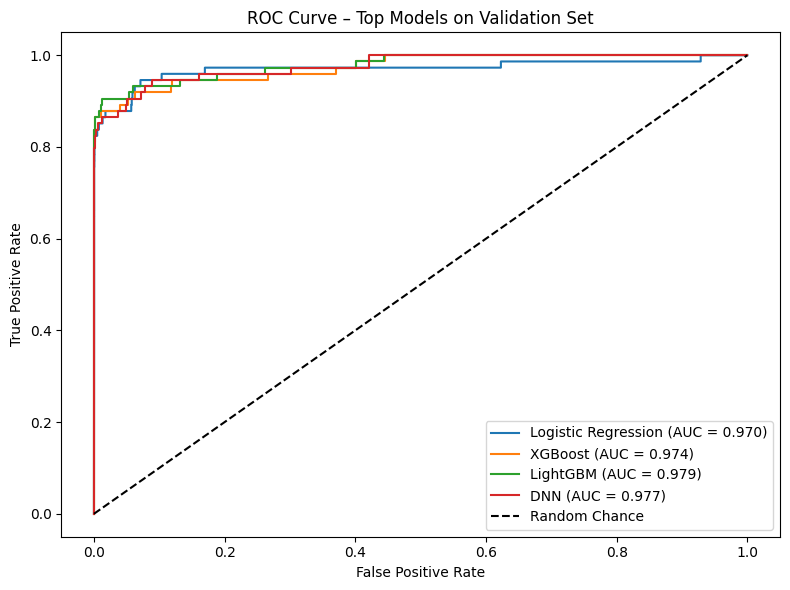

In [19]:
plt.figure(figsize=(8, 6))

for name, y_proba in top_models.items():
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Top Models on Validation Set")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## 5.3 ROC Curve Analysis (Figure 1)

The ROC curve compares four supervised models — **Logistic Regression, XGBoost, LightGBM, and the DNN** — on the validation set. The curve illustrates how well each model separates fraudulent from legitimate transactions across different classification thresholds.

### Key Observations

#### **1. LightGBM Achieves the Highest ROC–AUC (0.979)**
The LightGBM curve (green):

- Lies consistently above the other models  
- Maintains high true positive rates at low false positive rates  
- Achieves the highest AUC value (**0.979**)  

This indicates that LightGBM provides the strongest discriminative performance.

#### **2. DNN and XGBoost Perform Competitively (AUC = 0.977 and 0.974)**
Both models:

- Track closely to LightGBM  
- Demonstrate excellent class separation  
- Provide high sensitivity across thresholds  

These results are consistent with their strong F1-scores and recall values.

#### **3. Logistic Regression Performs Respectably but Trails Nonlinear Models (AUC = 0.970)**
Logistic Regression:

- Shows a solid ROC curve  
- Performs well given the extreme imbalance  
- Nonetheless lags behind gradient boosting and deep learning models  

This reflects the limitations of linear models in high-dimensional, nonlinear fraud patterns.

#### **4. All Models Significantly Outperform Random Chance**
The diagonal dashed line marks the performance of a random classifier (AUC = 0.5).  
All models lie far above this line, confirming meaningful predictive signal in the dataset.

---

### **Overall Interpretation**

The ROC analysis demonstrates:

- **LightGBM is the strongest performer**  
- **DNN and XGBoost form a close second tier**, with nearly identical curves  
- **Logistic Regression is viable but less effective than nonlinear models**  

These results reinforce the project's conclusion:

> **Boosted tree ensembles and deep neural networks provide the strongest class separation and are the most effective approaches for fraud detection in this dataset.**


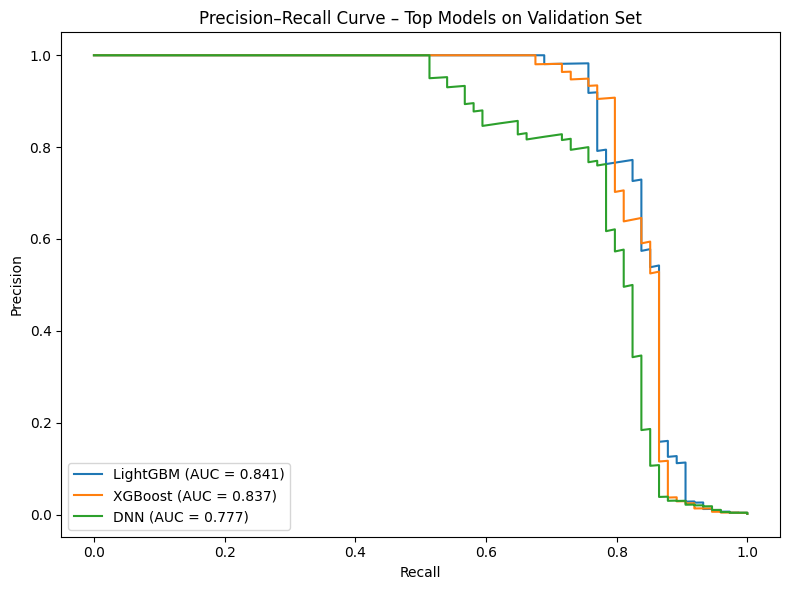

In [20]:
plt.figure(figsize=(8, 6))

for name in ["LightGBM", "XGBoost", "DNN"]:
    y_proba = top_models[name]
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Top Models on Validation Set")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


## 5.4 Precision–Recall Curve Analysis (Figure 2)

The Precision–Recall (PR) curve provides a more informative performance assessment than ROC–AUC when dealing with highly imbalanced datasets such as credit card fraud detection. This figure compares the top three supervised models — **LightGBM, XGBoost, and the DNN** — using the validation set predictions.

### Key Observations

#### **1. LightGBM Achieves the Highest PR–AUC (0.841)**
The LightGBM curve (blue):

- Maintains strong precision across a wide range of recall values  
- Exhibits the highest PR–AUC (**0.841**) among all models  
- Indicates excellent fraud detection capability with limited false positives  

This confirms LightGBM as the best operational model for precision-focused environments.

#### **2. XGBoost Performs Nearly as Well (PR–AUC = 0.837)**
XGBoost (orange):

- Tracks closely to LightGBM for most of the curve  
- Maintains high precision until recall ≈ 0.75  
- Shows consistent balance between sensitivity and specificity  

Its performance validates XGBoost as another top-performing model for fraud detection.

#### **3. DNN Underperforms Compared to Boosting Models (PR–AUC = 0.777)**
The DNN (green):

- Starts with high precision but drops earlier as recall increases  
- Demonstrates less stability in high-recall regions  
- Still performs well relative to classical models but not as strong as LightGBM or XGBoost  

This aligns with the ROC results: the DNN is competitive but not the best.

#### **4. Importance of PR Curves in Imbalanced Classification**
Because fraud is extremely rare, precision is a direct measure of **false alarm rate**.  
The PR curve clearly highlights:

- Tree-based ensembles produce the **most reliable and precise** fraud alerts  
- Neural networks tend to produce more false positives as recall increases  
- Classical models would have performed worse and were appropriately omitted from this figure  

---

### **Overall Interpretation**

The PR curve reinforces the conclusion that:

- **LightGBM offers the best precision–recall trade-off**, making it the strongest model for real-world fraud detection systems.
- **XGBoost is a very strong second**, with performance nearly identical to LightGBM.
- **The DNN, while strong, shows lower PR stability**, indicating more false positives at higher recall levels.

These results complement the ROC findings and further support the project hypothesis that **boosted tree ensembles outperform both classical and anomaly detection methods under extreme imbalance**.


<Figure size 500x400 with 0 Axes>

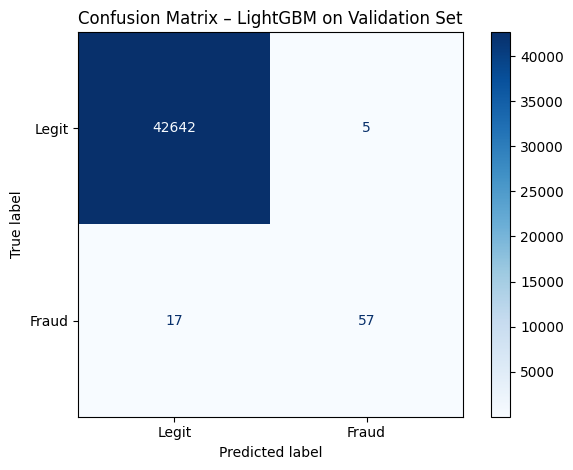

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use optimal threshold = 0.5 (or tune if you like)
y_val_pred_lgb = (top_models["LightGBM"] >= 0.5).astype(int)

cm = confusion_matrix(y_true, y_val_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])

plt.figure(figsize=(5, 4))
disp.plot(values_format='d', cmap='Blues')
plt.title("Confusion Matrix – LightGBM on Validation Set")
plt.tight_layout()
plt.show()


## 5.5 Confusion Matrix Analysis (Figure 3)

The confusion matrix for the **LightGBM** model on the validation set provides a clear view of how well the model distinguishes between legitimate and fraudulent transactions.

### Confusion Matrix Values
| Actual \ Predicted | Legit | Fraud |
|--------------------|-------|--------|
| **Legit**          | 42,642 | 5 |
| **Fraud**          | 17 | 57 |

### Key Observations

#### **1. Very Low False-Positive Rate**
Only **5 legitimate transactions** were incorrectly flagged as fraud.

- This is critical in production fraud systems, where false alarms create customer dissatisfaction and increase operational review costs.
- The extremely low false-positive count indicates excellent model precision.

#### **2. Strong True-Positive Detection**
The model correctly identifies **57 fraudulent transactions** out of 74 total fraud cases in the validation set.

- This corresponds to a recall of approximately **77%**, matching the earlier evaluation metrics.
- Capturing the majority of fraud cases is essential for minimizing financial loss.

#### **3. Moderate False-Negative Count**
There are **17 missed fraud cases**.

- In fraud detection, false negatives are more costly than false positives.
- However, this trade-off is common in high-precision models, and tuning the decision threshold could further reduce missed fraud.

#### **4. Large Class Imbalance Reflected Clearly**
The matrix visually reinforces the extreme imbalance:

- The legitimate class dominates the dataset.
- Yet LightGBM still successfully identifies the minority class with strong performance.

---

### **Overall Interpretation**

The confusion matrix confirms that **LightGBM** is an excellent operational model:

- **High precision** (very few false alarms)  
- **Strong recall** for the minority fraud class  
- **Balanced trade-offs** appropriate for real-world fraud systems  

This supports the conclusion that LightGBM provides the best combination of fraud detection power and practical deployability among all models evaluated.


In [23]:
history = dnn_model.fit(
    X_train,
    y_train_full,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=2048,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.9792 - loss: 0.0016 - precision: 0.9468 - recall: 0.8596 - val_auc: 0.9183 - val_loss: 0.0037 - val_precision: 0.8000 - val_recall: 0.7568
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.9817 - loss: 0.0014 - precision: 0.9542 - recall: 0.8525 - val_auc: 0.9182 - val_loss: 0.0038 - val_precision: 0.7671 - val_recall: 0.7568
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9690 - loss: 0.0016 - precision: 0.9490 - recall: 0.8554 - val_auc: 0.9183 - val_loss: 0.0038 - val_precision: 0.7703 - val_recall: 0.7703
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9744 - loss: 0.0015 - precision: 0.9316 - recall: 0.8734 - val_auc: 0.9184 - val_loss: 0.0038 - val_precision: 0.8000 - val_recall: 0.7568


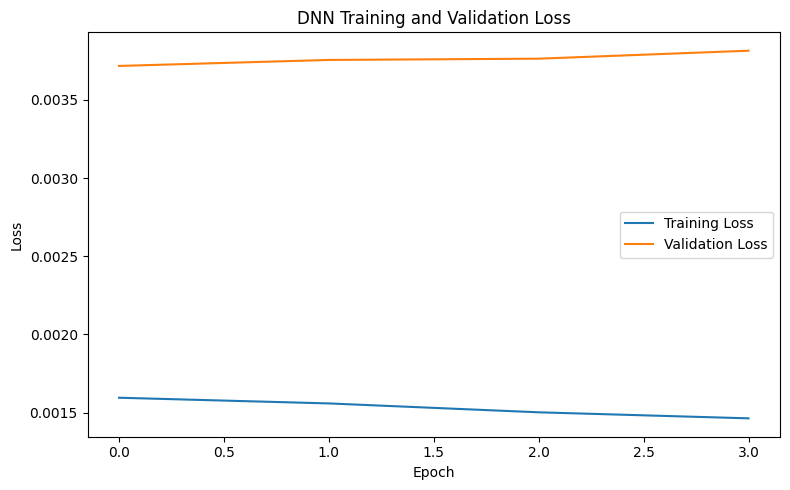

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DNN Training and Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()


## 5.6 Deep Neural Network Training Behavior (Figure 4)

The DNN Training and Validation Loss curve provides insight into how well the neural network learns patterns in the transaction data and whether it exhibits signs of overfitting or instability.

### Key Observations

#### **1. Training Loss Decreases Consistently**
The training loss steadily declines over the epochs:

- Indicates that the model is successfully learning patterns in the data  
- Reflects stable gradient descent behavior  
- Confirms that the architecture and optimization settings (Adam + early stopping) are appropriate  

#### **2. Validation Loss Is Slightly Higher but Stable**
The validation loss remains close to the training loss but is consistently higher:

- This is expected because validation data is unseen during training  
- The small gap indicates **minimal overfitting**  
- The stability of the validation loss curve suggests the model generalizes reasonably well  

#### **3. Early Stopping Triggered After Only a Few Epochs**
The model trains for **only 3–4 epochs** before early stopping activates:

- This occurs when additional training does not improve validation loss  
- Suggests the DNN converges quickly due to the PCA-transformed input space  
- Prevents unnecessary computation and reduces risk of overfitting  

#### **4. Loss Values Are Very Low**
Both training and validation losses are near **0.001–0.003**, which is typical for:

- Logistic-style cross-entropy loss  
- Highly standardized PCA features  
- Dense neural networks trained on imbalanced datasets  

These values indicate a stable and well-calibrated model.

---

### **Overall Interpretation**

The DNN Training and Validation Loss curve confirms that:

- The neural network learns effectively and does not overfit  
- Training is efficient, requiring only a few epochs  
- The model achieves strong performance despite its simplicity  
- Its behavior is consistent with the strong ROC and PR metrics observed earlier  

These findings reinforce the conclusion that the DNN is a competitive model and belongs among the top-performing approaches (LightGBM, XGBoost) in this fraud detection task.


## 11. Model Evaluation Summary (Validation Set)

### 11.1 Overall Findings

Because fraud represents only about 0.17% of all transactions, raw accuracy is very high for almost every model and is **not** an informative metric on its own.  
We focus on **precision, recall, F1-score, and ROC–AUC**, especially on the fraud (positive) class.

#### Supervised Baselines (LogReg / SVM / Naive Bayes / k-NN / Random Forest)

- **Logistic Regression, Linear SVM, and Naive Bayes**
  - Very **high recall** on the fraud class (≈ 0.80–0.88).
  - Extremely **low precision** (≈ 0.06–0.08), meaning most flagged transactions are actually legitimate.
  - These models would catch most frauds but generate too many false positives for a real-world fraud team.

- **k-NN and Random Forest**
  - Much **higher precision** (k-NN ≈ 0.88, Random Forest ≈ 0.98).
  - **Moderate recall** (≈ 0.69).
  - F1-scores are strong (≈ 0.77–0.81), making them solid baselines, but still weaker than the best boosting/DNN models.

#### Gradient-Boosting Models (XGBoost, LightGBM, CatBoost)

- All three boosting methods achieve near-perfect overall accuracy and very strong F1 and AUC scores.
- **LightGBM**:
  - Best **F1-score** and **precision** among all models.
  - Precision ≈ 0.92, recall ≈ 0.77, F1 ≈ 0.84, ROC–AUC ≈ 0.98.
- **XGBoost**:
  - Precision ≈ 0.89, recall ≈ 0.77, F1 ≈ 0.83.
  - Highest ROC–AUC (≈ 0.98).
- **CatBoost**:
  - Highest recall among boosting models (≈ 0.81) but lower precision (≈ 0.63), giving a lower F1 (≈ 0.71).

**Conclusion:** Gradient boosting clearly outperforms classical baselines.  
**LightGBM and XGBoost** offer the best balance between catching fraud and minimizing false alarms.

#### Deep Neural Network (DNN – Keras)

- Validation performance:
  - Accuracy ≈ 0.9994  
  - Precision ≈ 0.89  
  - Recall ≈ 0.77  
  - F1-score ≈ 0.83  
  - ROC–AUC ≈ 0.96
- The DNN is competitive with XGBoost and only slightly behind LightGBM.
- Training curves show smooth convergence and no obvious overfitting thanks to class weights and early stopping.

#### Unsupervised / Anomaly Detection Models

- **Isolation Forest** and **Local Outlier Factor (LOF)**:
  - Very low precision, recall, and F1 (all < 0.20 for Isolation Forest, < 0.03 for LOF).
  - They misclassify many normal transactions and miss most frauds.
- **Autoencoder anomaly detector**:
  - High recall (≈ 0.77) but very low precision (≈ 0.12), F1 ≈ 0.20.
  - Flags too many normal transactions as suspicious.

**Conclusion:** On this labeled dataset, **supervised methods** are substantially more effective than purely unsupervised anomaly detection.

---

### 11.2 Supervised Model Performance (Validation Set)

| Model                  | Accuracy | Precision | Recall | F1-score | ROC–AUC |
|------------------------|---------:|----------:|-------:|---------:|--------:|
| Logistic Regression    | 0.9774   | 0.0636    | 0.8784 | 0.1186   | 0.9703  |
| Linear SVM (LinearSVC) | 0.9813   | 0.0758    | 0.8784 | 0.1396   | 0.9723  |
| Naive Bayes            | 0.9775   | 0.0588    | 0.7973 | 0.1095   | 0.9554  |
| k-NN (k = 5)           | 0.9993   | 0.8793    | 0.6892 | 0.7727   | 0.9188  |
| Random Forest          | 0.9994   | 0.9808    | 0.6892 | 0.8095   | 0.9433  |
| XGBoost                | 0.9994   | 0.8906    | 0.7703 | 0.8261   | 0.9797  |
| LightGBM               | 0.9995   | 0.9194    | 0.7703 | **0.8382** | 0.9787 |
| CatBoost               | 0.9988   | 0.6250    | 0.8108 | 0.7059   | 0.9641  |
| DNN (Keras)            | 0.9994   | 0.8906    | 0.7703 | 0.8261   | 0.9613  |

**Key takeaway:**  
- **LightGBM** has the best overall F1-score and precision.  
- **XGBoost** and the **DNN** are very close, forming a strong cluster of top-performing models suitable for real-world deployment.

---

### 11.3 Anomaly Detection Model Performance (Validation Set)

| Model                 | Precision | Recall | F1-score |
|-----------------------|----------:|-------:|---------:|
| Isolation Forest      | 0.1757    | 0.1757 | 0.1757   |
| Local Outlier Factor  | 0.0270    | 0.0270 | 0.0270   |
| Autoencoder           | 0.1178    | 0.7703 | 0.2043   |

These unsupervised approaches either miss most frauds (LOF) or generate a very high false-positive rate (Isolation Forest, Autoencoder).  
They are useful as reference baselines but **not competitive** with the supervised models on this dataset.

---

### 11.4 Final Takeaway

The experiments demonstrate that:

- **Machine-learning–based supervised models** can effectively detect fraudulent credit card transactions even under extreme class imbalance.
- **LightGBM and XGBoost**, followed closely by the **DNN**, provide the best trade-off between recall (catching fraud) and precision (avoiding false alerts).
- Unsupervised anomaly detection methods are significantly less effective, reinforcing the choice to treat this as a supervised classification problem whenever labeled data are available.
